# 1.5 Climate ANN

This script contains the following points:

#### 1. Import libraries & data

#### 2. ANN for unscaled data

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [3]:
#Create a path to where your data is stored.
path = r'/Users/chrismace/Desktop/7 Machine Learning'

In [5]:
# loading unscaled data, 3 stations and date and month already dropped
df_unscaled = pd.read_csv(os.path.join(path, 'climate_unscaled.csv'), index_col=0)

In [6]:
df_unscaled.head()

,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,VALENTIA_temp_mean
0,6.5,3.7,2.4,9.3,10.0,10.6,7.9,-0.6,9.5,7.6,6.9,4.9,-5.9,4.2,8.5
1,6.1,2.9,2.3,7.7,8.2,6.1,7.7,2.1,8.6,9.8,6.2,3.4,-9.5,4.0,8.9
2,8.5,3.1,2.7,6.8,7.1,8.4,6.5,4.6,6.9,8.6,5.8,1.9,-9.5,2.4,10.5
3,6.3,2.0,2.0,6.7,6.8,9.4,5.8,3.2,7.0,10.3,3.9,3.0,-11.5,1.2,7.4
4,3.0,2.0,2.5,8.0,7.7,8.9,5.4,3.6,8.1,12.1,1.8,3.7,-9.3,3.3,5.7


In [7]:
# loading answer data, date already dropped
df_answers = pd.read_csv(os.path.join(path, 'climate_answers.csv'), index_col=0)

In [8]:
df_answers.head()

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
df_unscaled.shape

(22950, 15)

In [10]:
df_answers.shape

(22950, 15)

#### 2. ANN for unscaled data

In [11]:
#Create an 'X' matrix 
X = df_unscaled
y = df_answers

In [12]:
print(X.shape)
print(y.shape)

(22950, 15)
(22950, 15)


In [13]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 15)
(5738, 15)
(17212, 15)
(5738, 15)


In [17]:
#Scaling the data
scaler = StandardScaler()

#Fit the train data
scaler.fit(X_train)

#Scaling the X data
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

print(X_train_sc[:10])

[[ 1.35262702  1.11408523  1.26048221  0.98510239  1.18267178  0.79366897
   1.16696642  1.02406684  1.12530567  1.32713725  1.26235516  0.49003378
   1.0719053   0.14041372  1.45475014]
 [-1.65254457 -1.84706463 -1.77256635 -1.98055572 -2.10946465 -1.72667839
  -0.01359355 -1.83095876 -2.09029531 -1.23266439 -1.73566519 -2.14158559
  -1.80450767 -1.77299837 -0.0139084 ]
 [-1.65254457 -1.07557731 -1.43164228 -2.35915038 -2.37401133 -2.43932834
  -2.27141449 -1.22608045 -2.43428984 -1.73115208 -1.43460876 -2.5296585
  -1.322672   -1.94694492 -2.92125284]
 [-1.59839734 -1.35921235 -1.20827824 -1.55463674 -1.68325056 -1.53547963
  -1.78443351 -1.34705611 -1.67151937 -1.7042068  -1.66040109 -1.57160352
  -2.31554551 -1.18903494 -1.1828407 ]
 [-0.58313666 -0.67848825 -0.65574614 -0.68702399 -0.84551941 -0.70115774
  -0.01359355 -0.50022649 -0.6395358  -0.5320871  -0.48126337 -0.71056677
  -1.41027848 -0.79144282 -0.0139084 ]
 [ 1.06835403  0.68295996  0.81375413  0.32256175  0.41842582  0.9

In [18]:
#Assign the scaled data to DataFrames
X_train_df = pd.DataFrame(X_train_sc, index=X_train.index, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_sc, index=X_test.index, columns=X_test.columns)

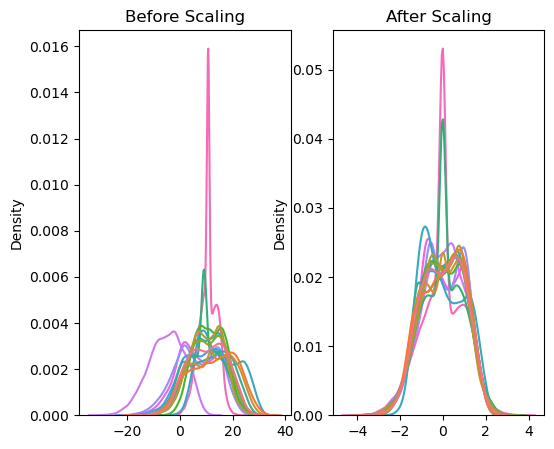

In [22]:
#Show scaling differences
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train, legend=False, ax=ax1)


ax2.set_title('After Scaling')
sns.kdeplot(X_train_df, legend=False, ax=ax2)

plt.show()

#### After scaling, the distributions are much closer to normal

In [25]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500)

In [26]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.4379502672554032
0.44004879749041476


/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


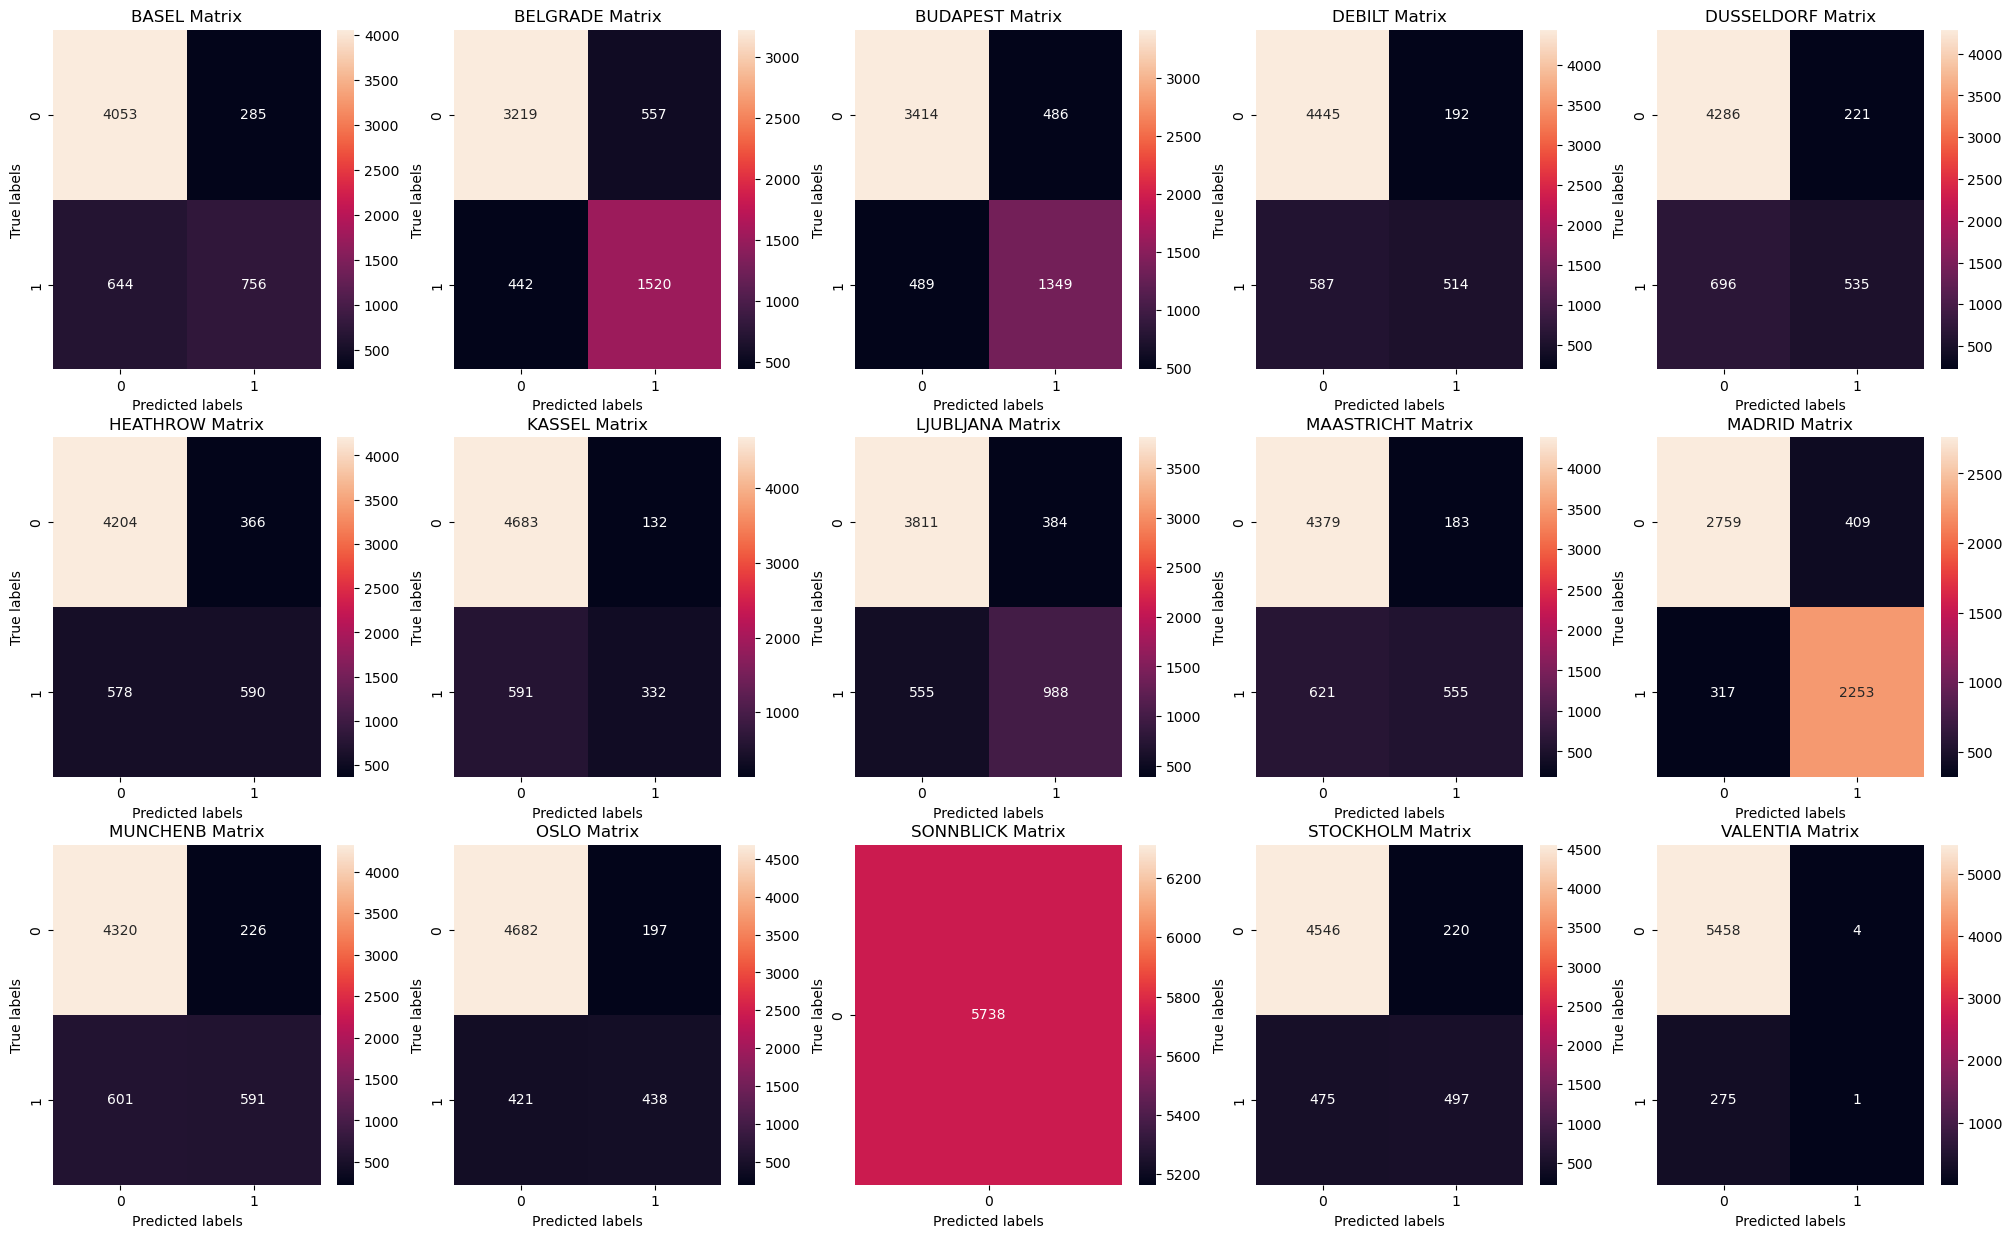

In [28]:
locations = list({x.split("_")[0] for x in df_scaled.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


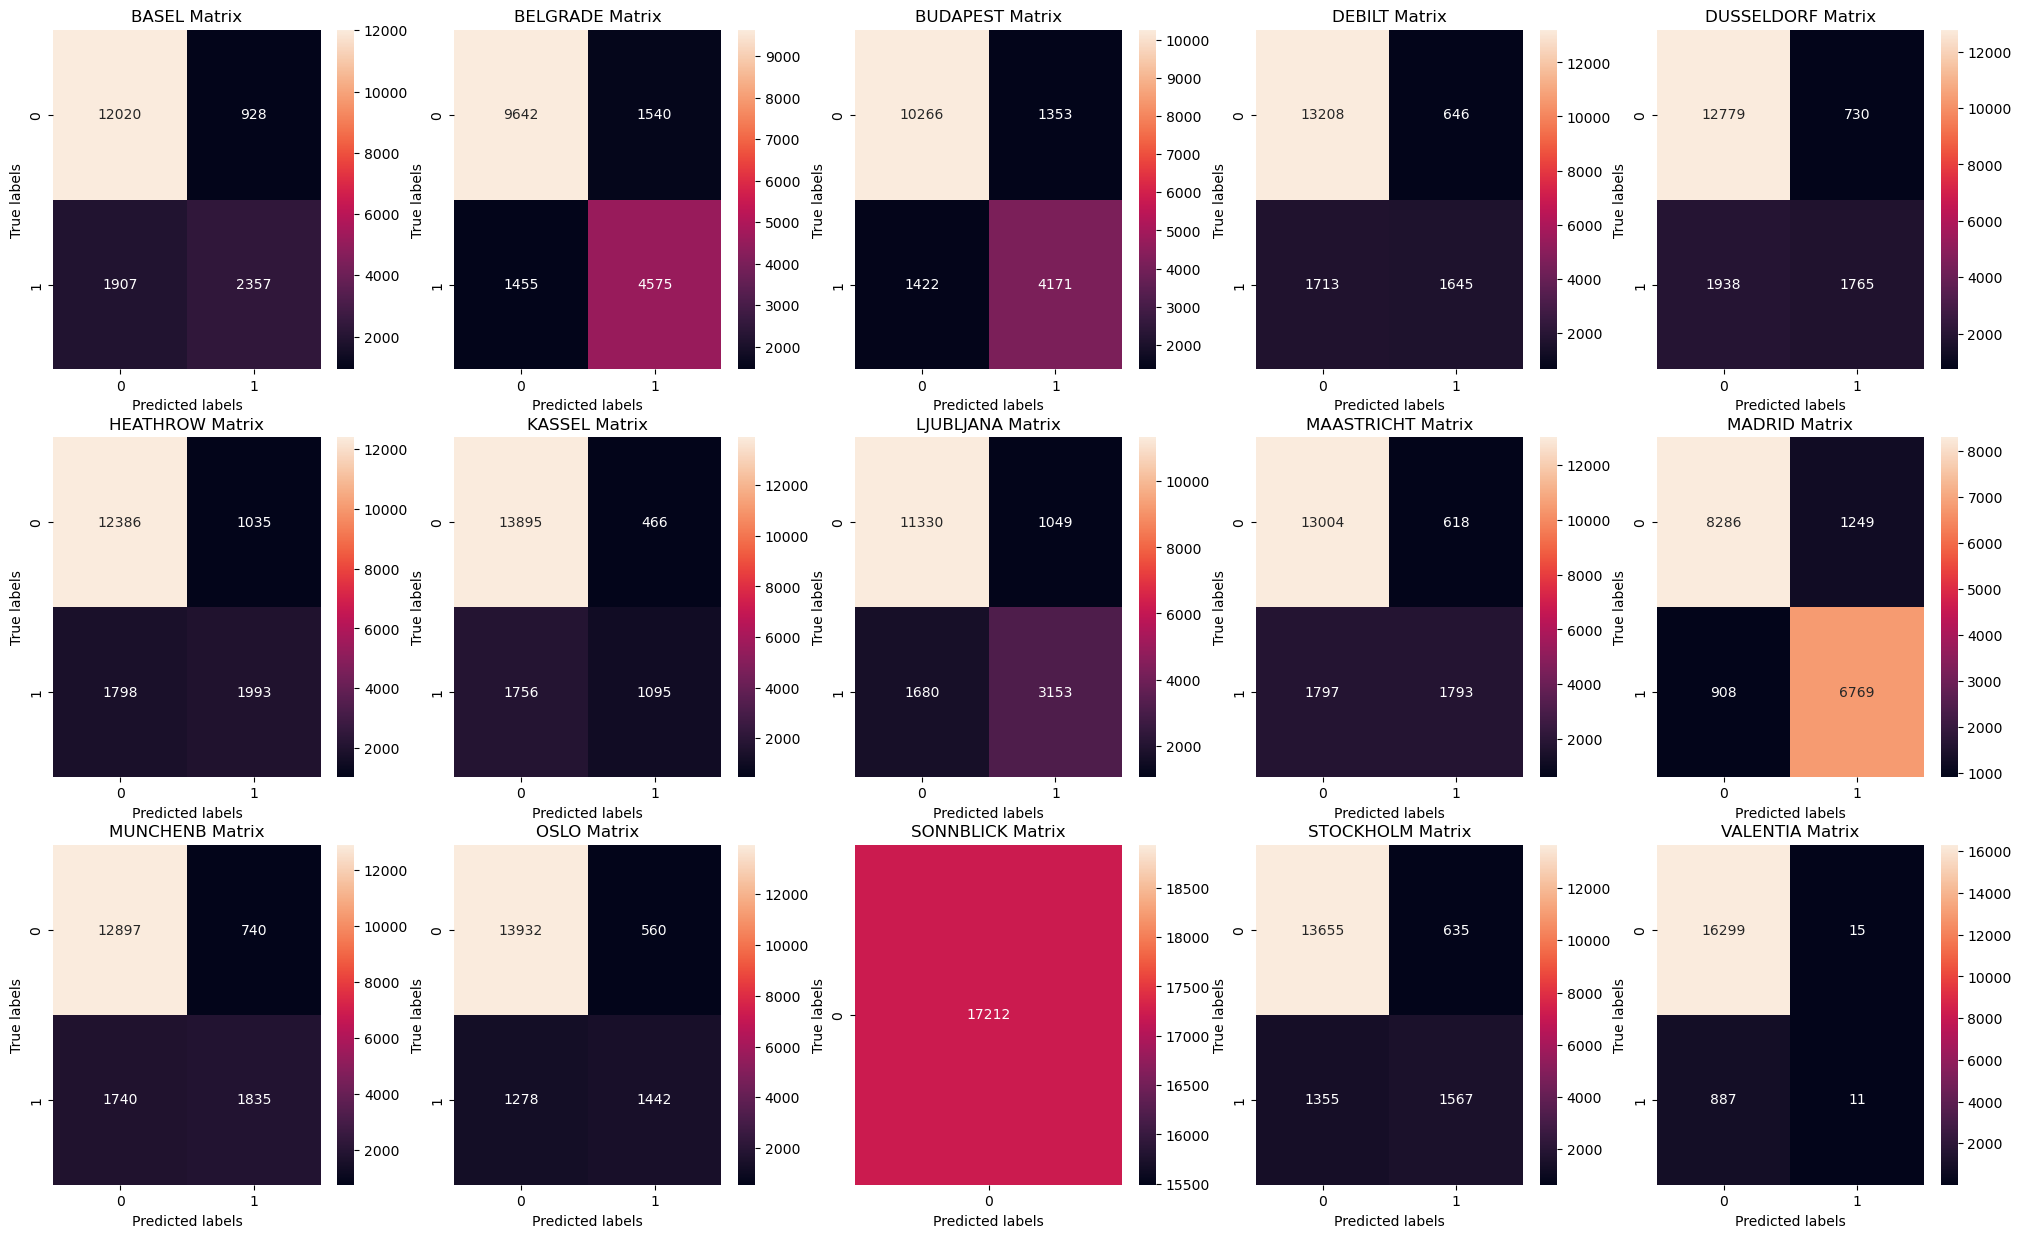

In [29]:
locations = list({x.split("_")[0] for x in df_scaled.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

#### Scenario 2

In [30]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500)

In [31]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.4405647222867767
0.44893691181596374


/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


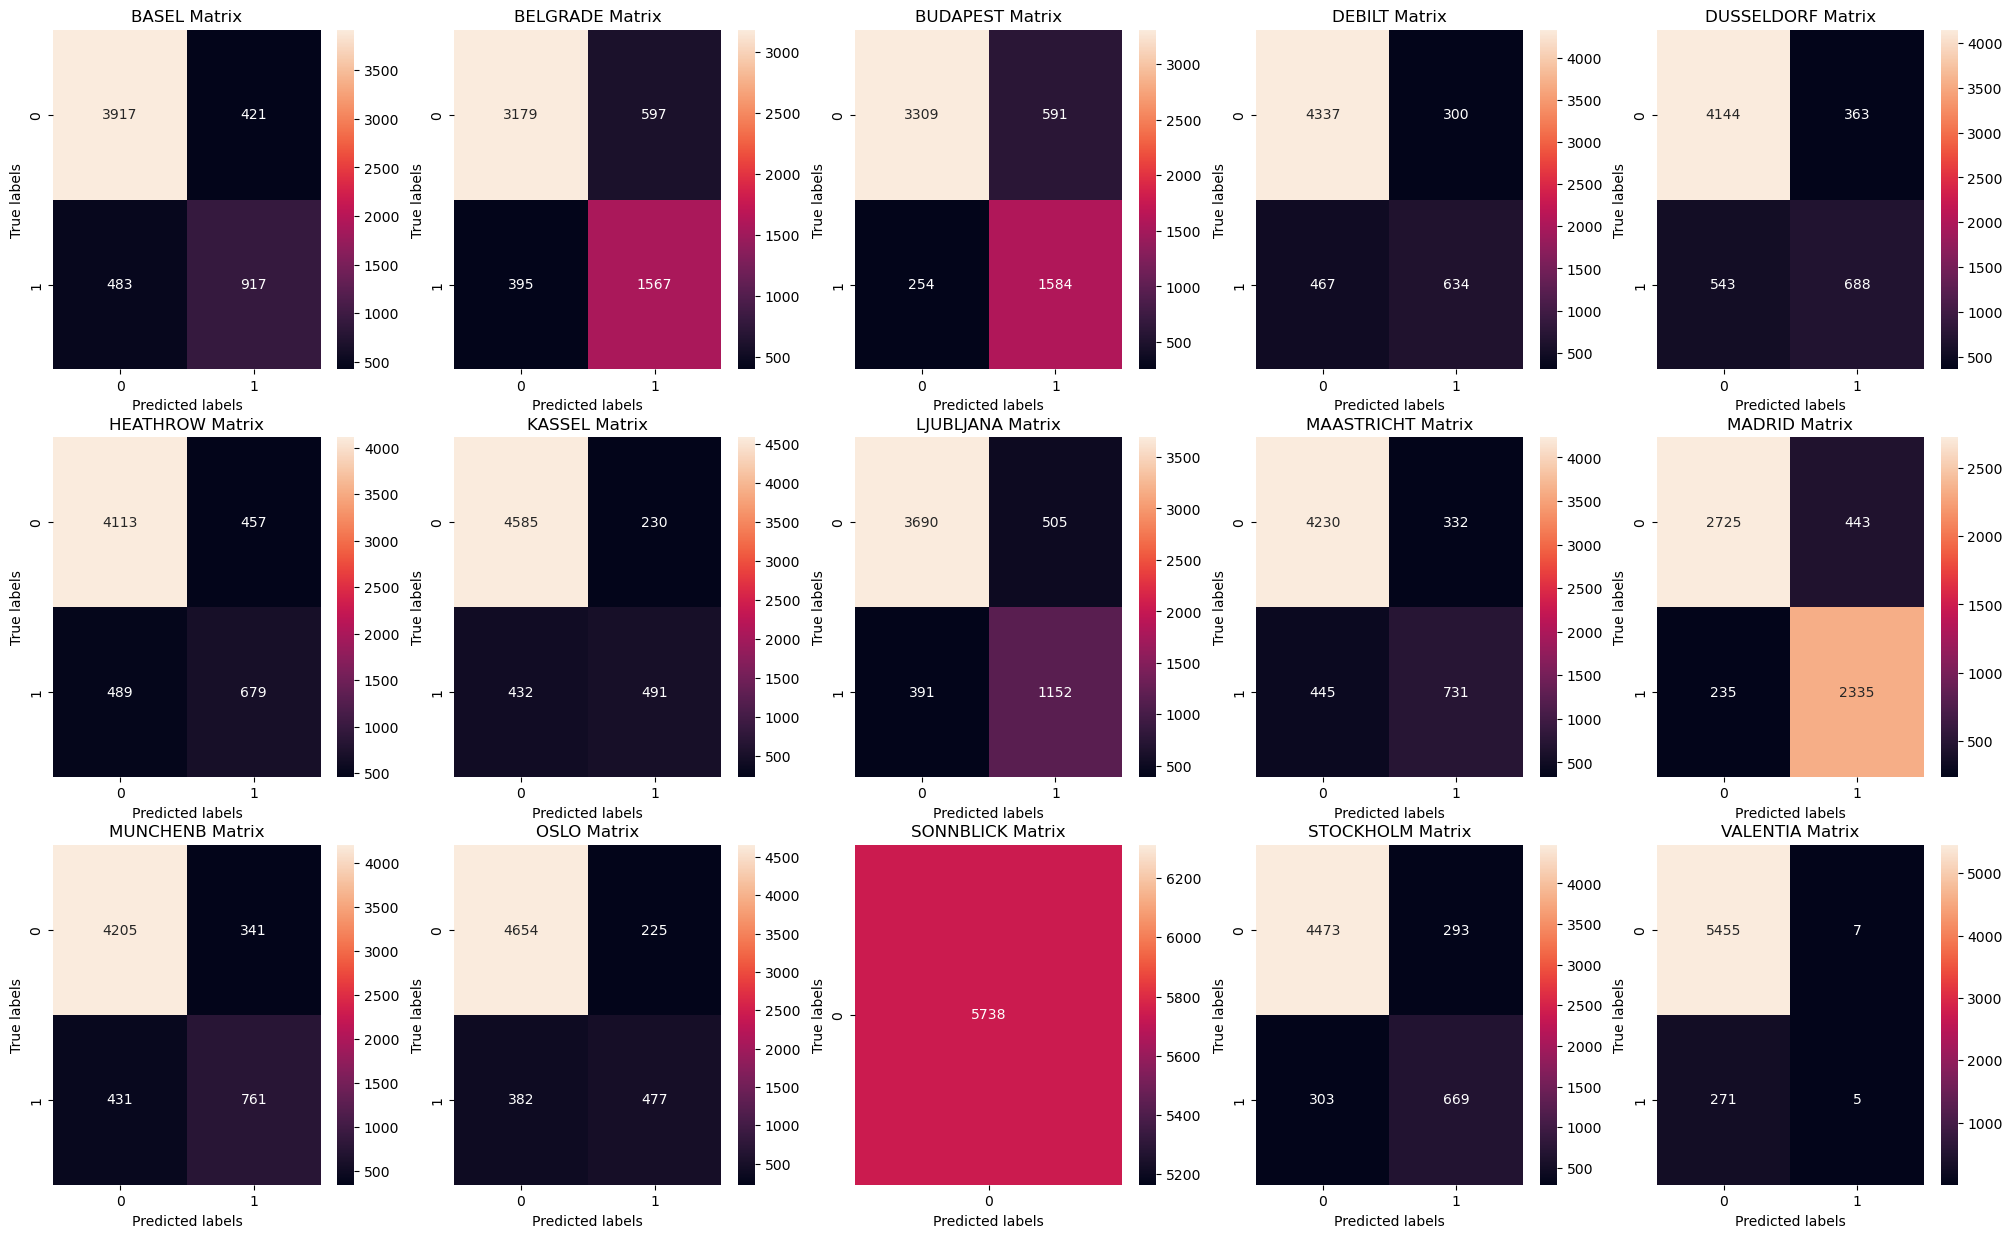

In [32]:
locations = list({x.split("_")[0] for x in df_scaled.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


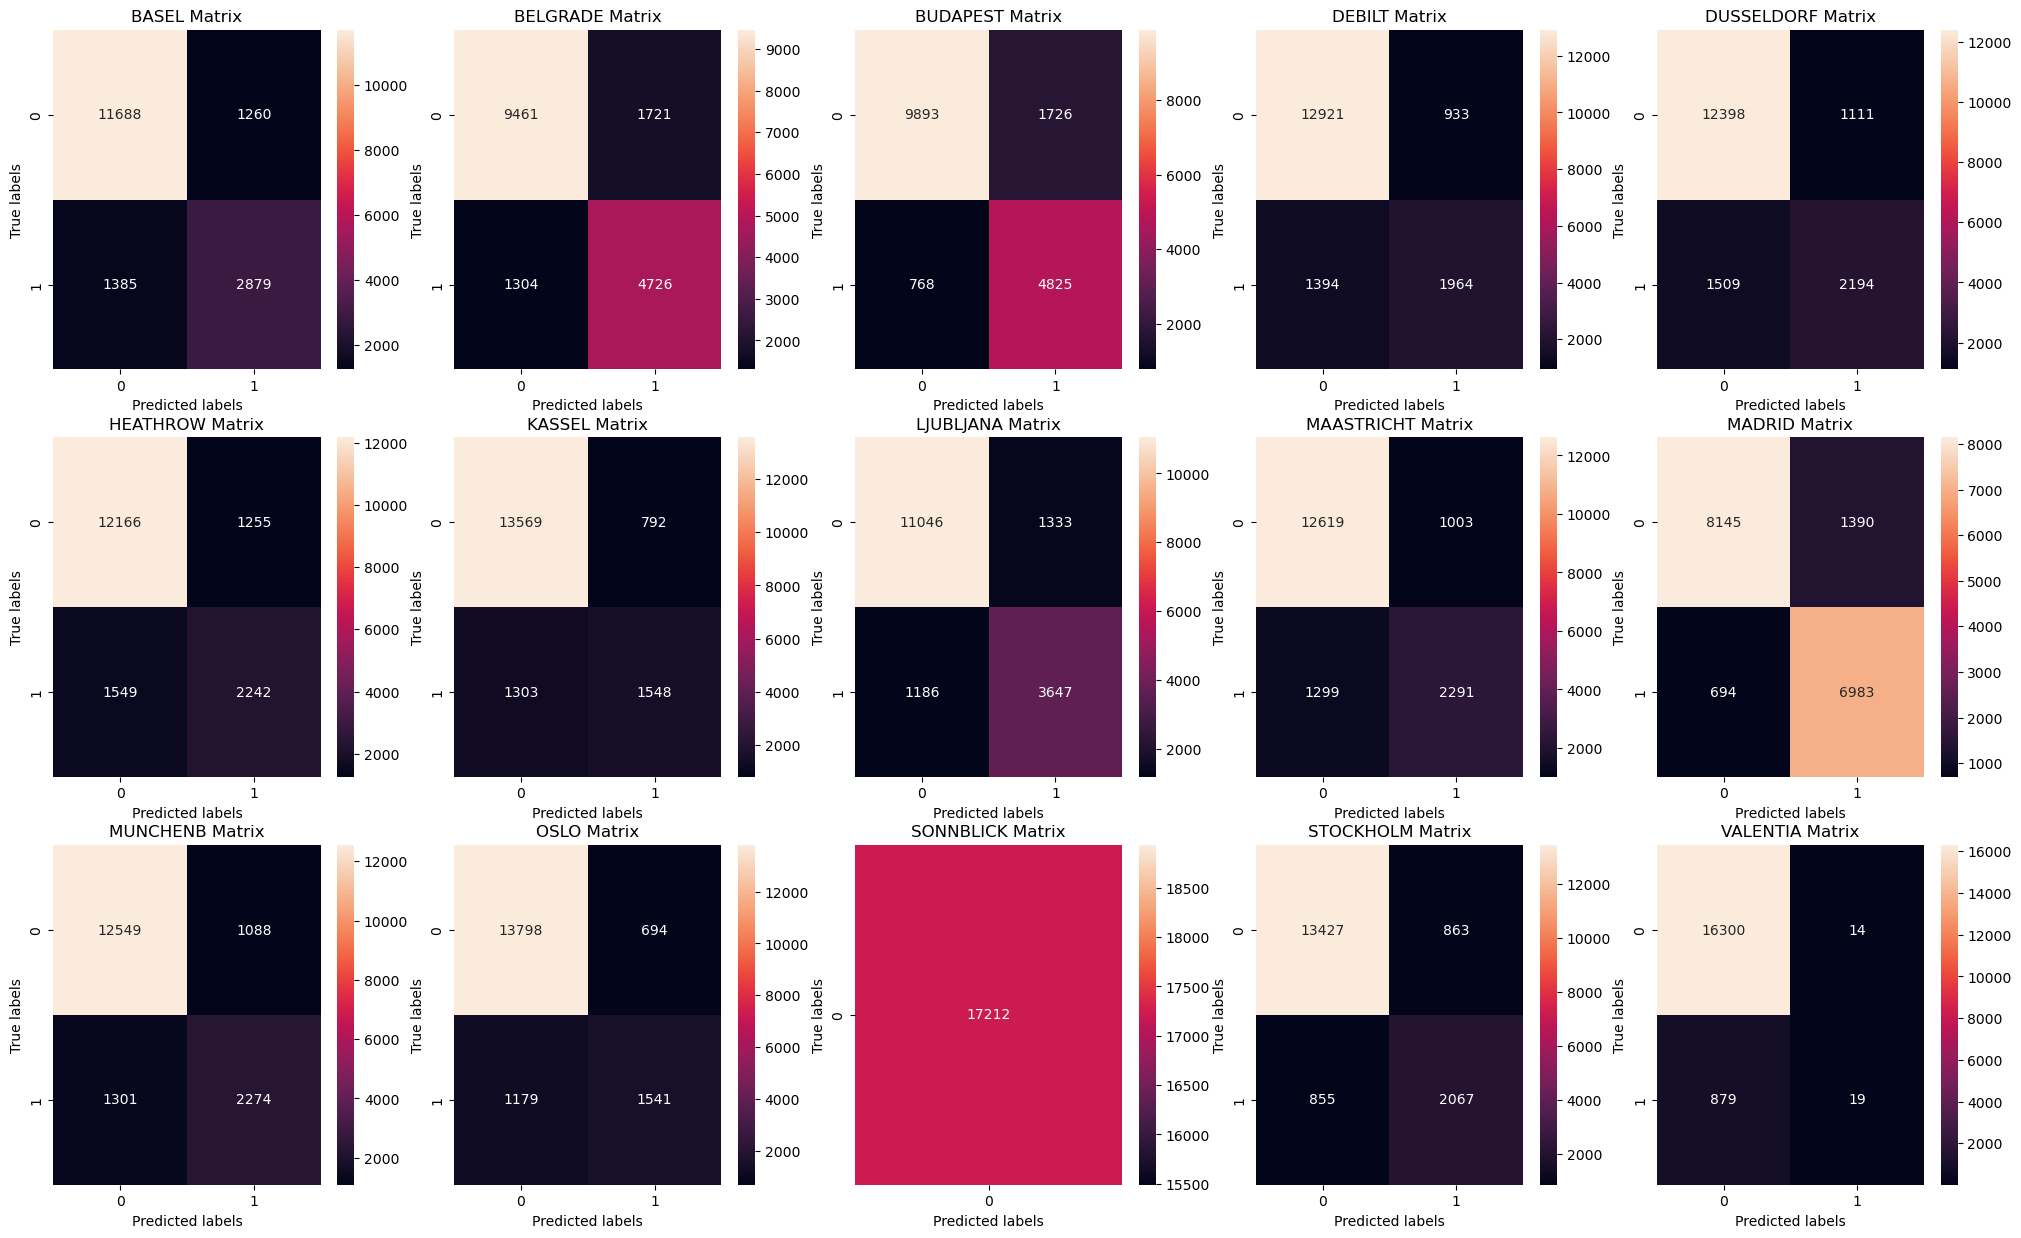

In [33]:
locations = list({x.split("_")[0] for x in df_scaled.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

#### Scenario 3

In [58]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(100, 50, 25), max_iter=2000, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50, 25), max_iter=2000)

In [59]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.470020915640251
0.4459742070407808


/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


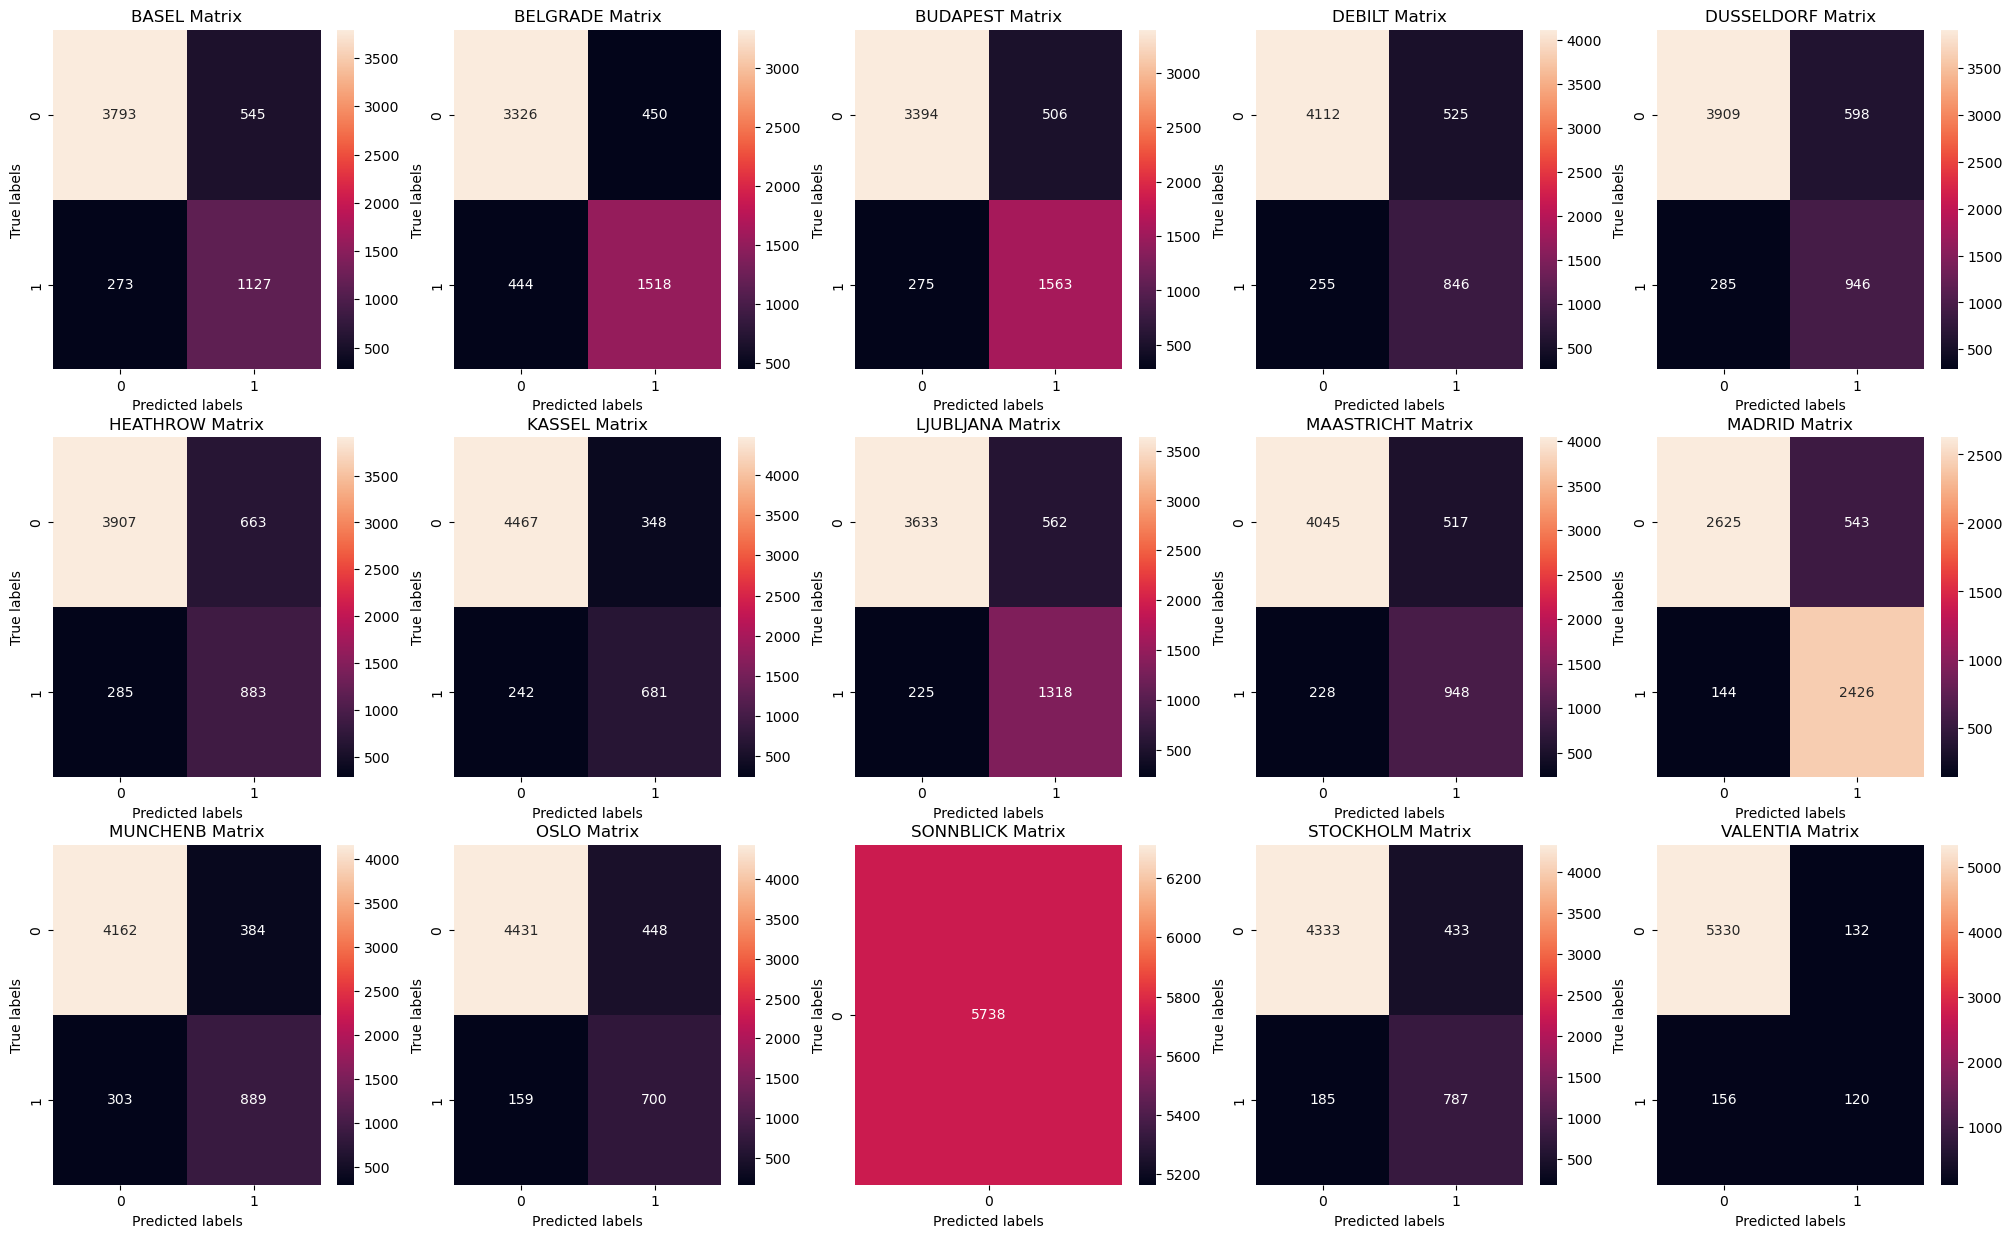

In [60]:
locations = list({x.split("_")[0] for x in df_scaled.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


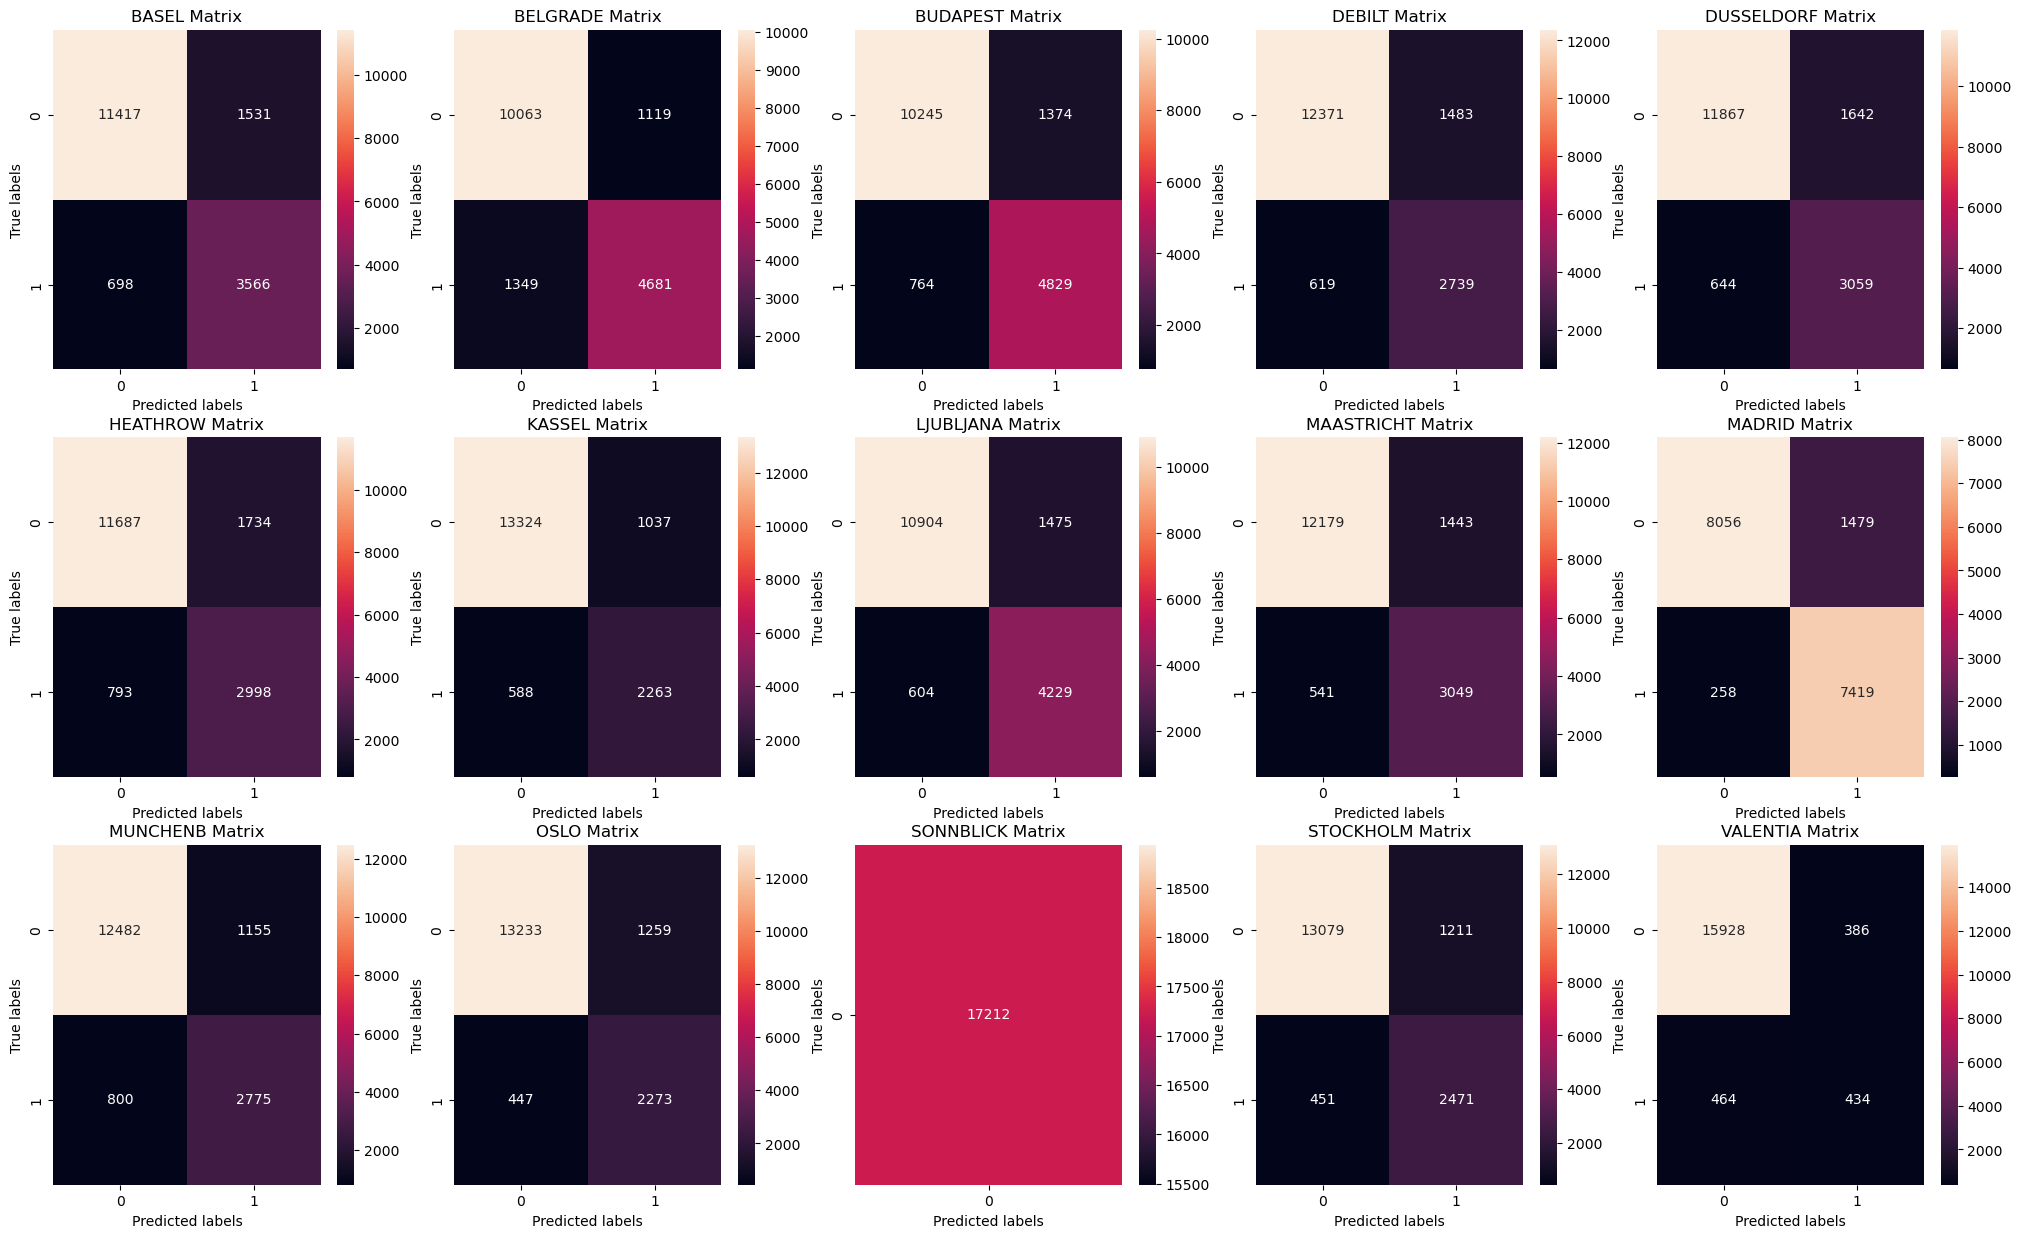

In [61]:
locations = list({x.split("_")[0] for x in df_scaled.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

#### Scenario 4

In [66]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(500, 250, 125), max_iter=1000, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(500, 250, 125), max_iter=1000)

In [67]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.7258308157099698
0.4241896131056117


/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


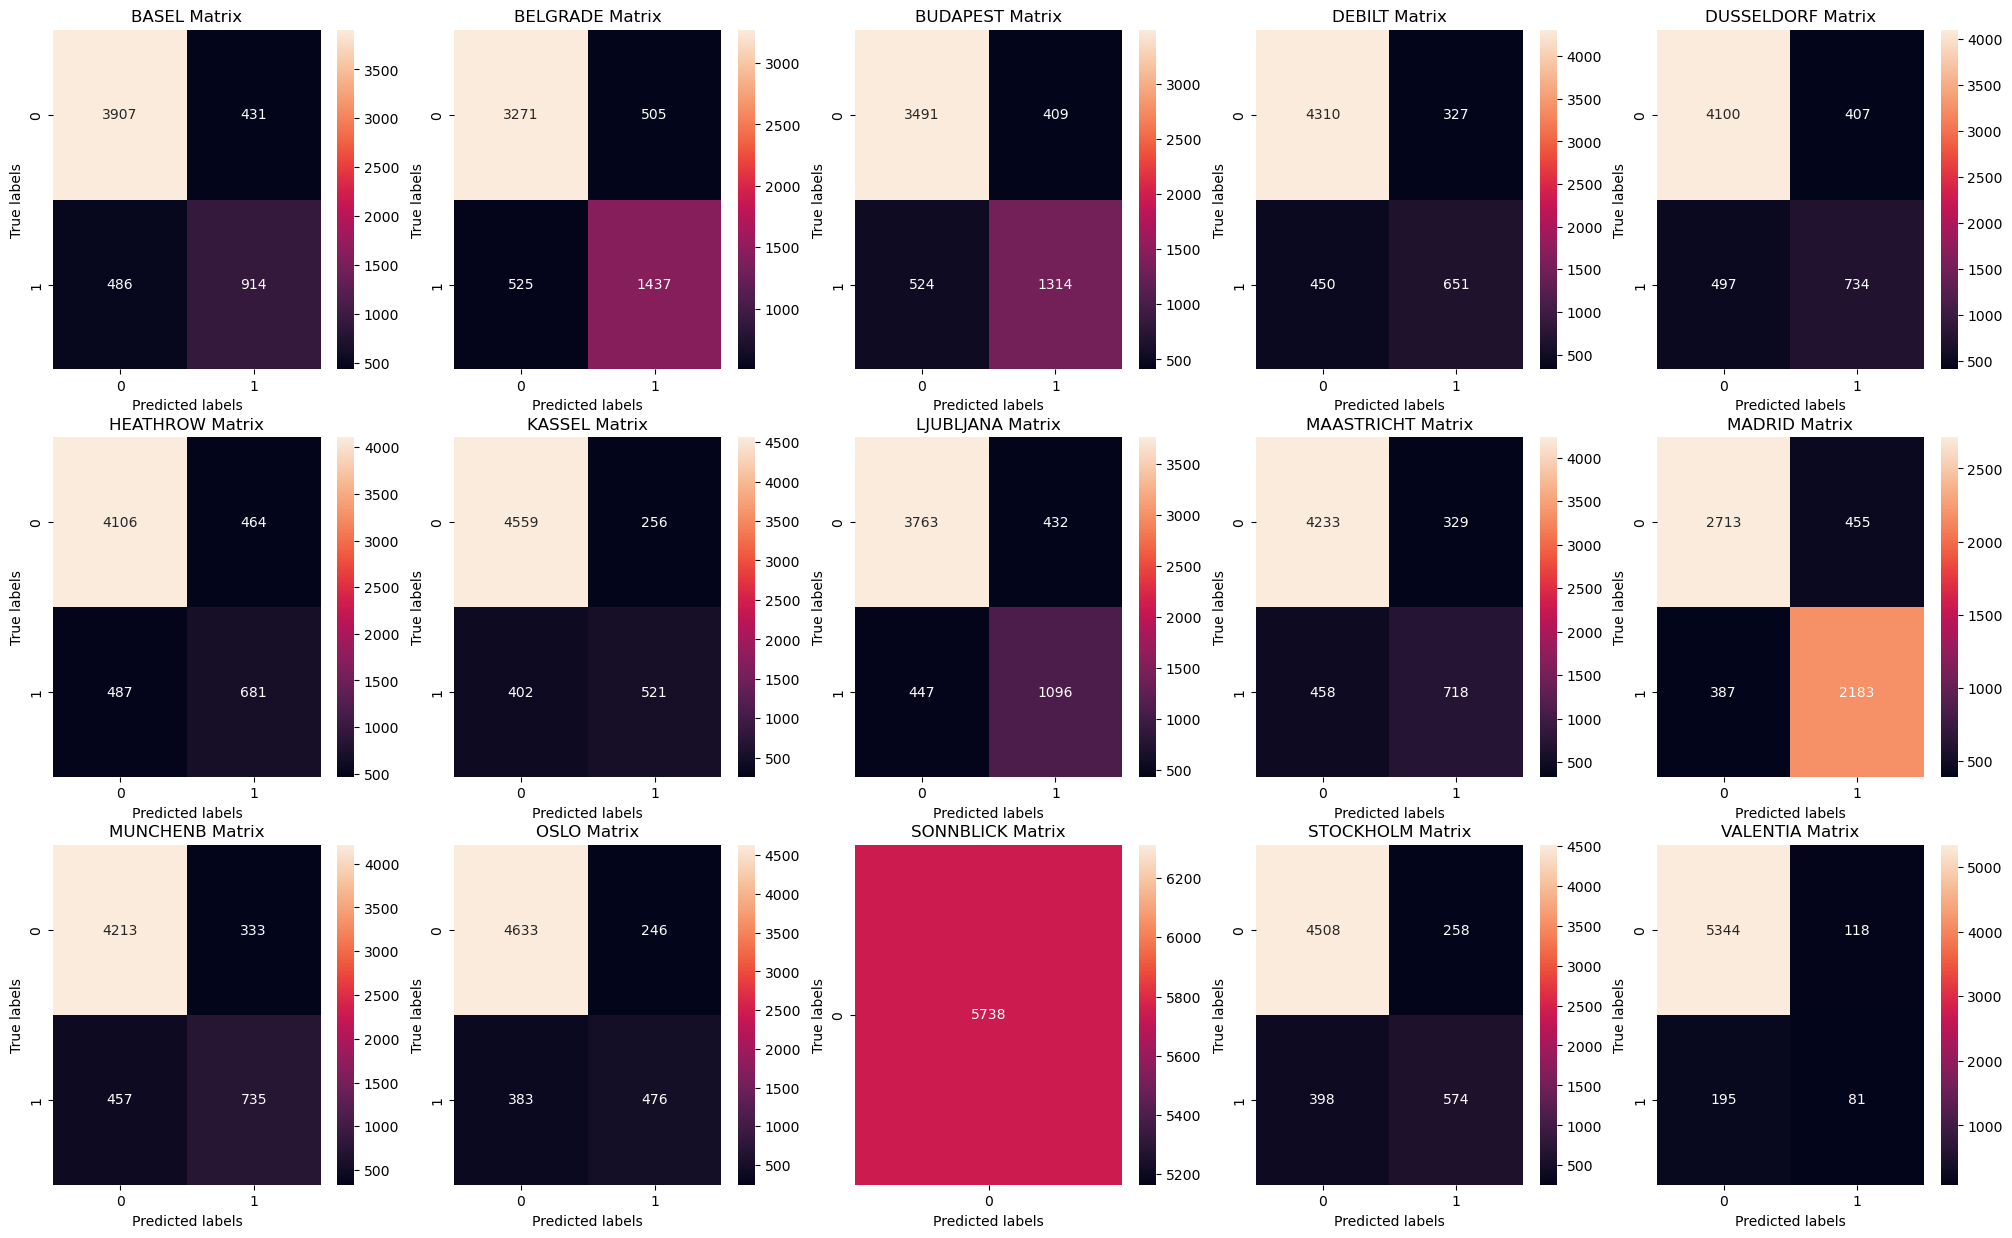

In [68]:
locations = list({x.split("_")[0] for x in df_scaled.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


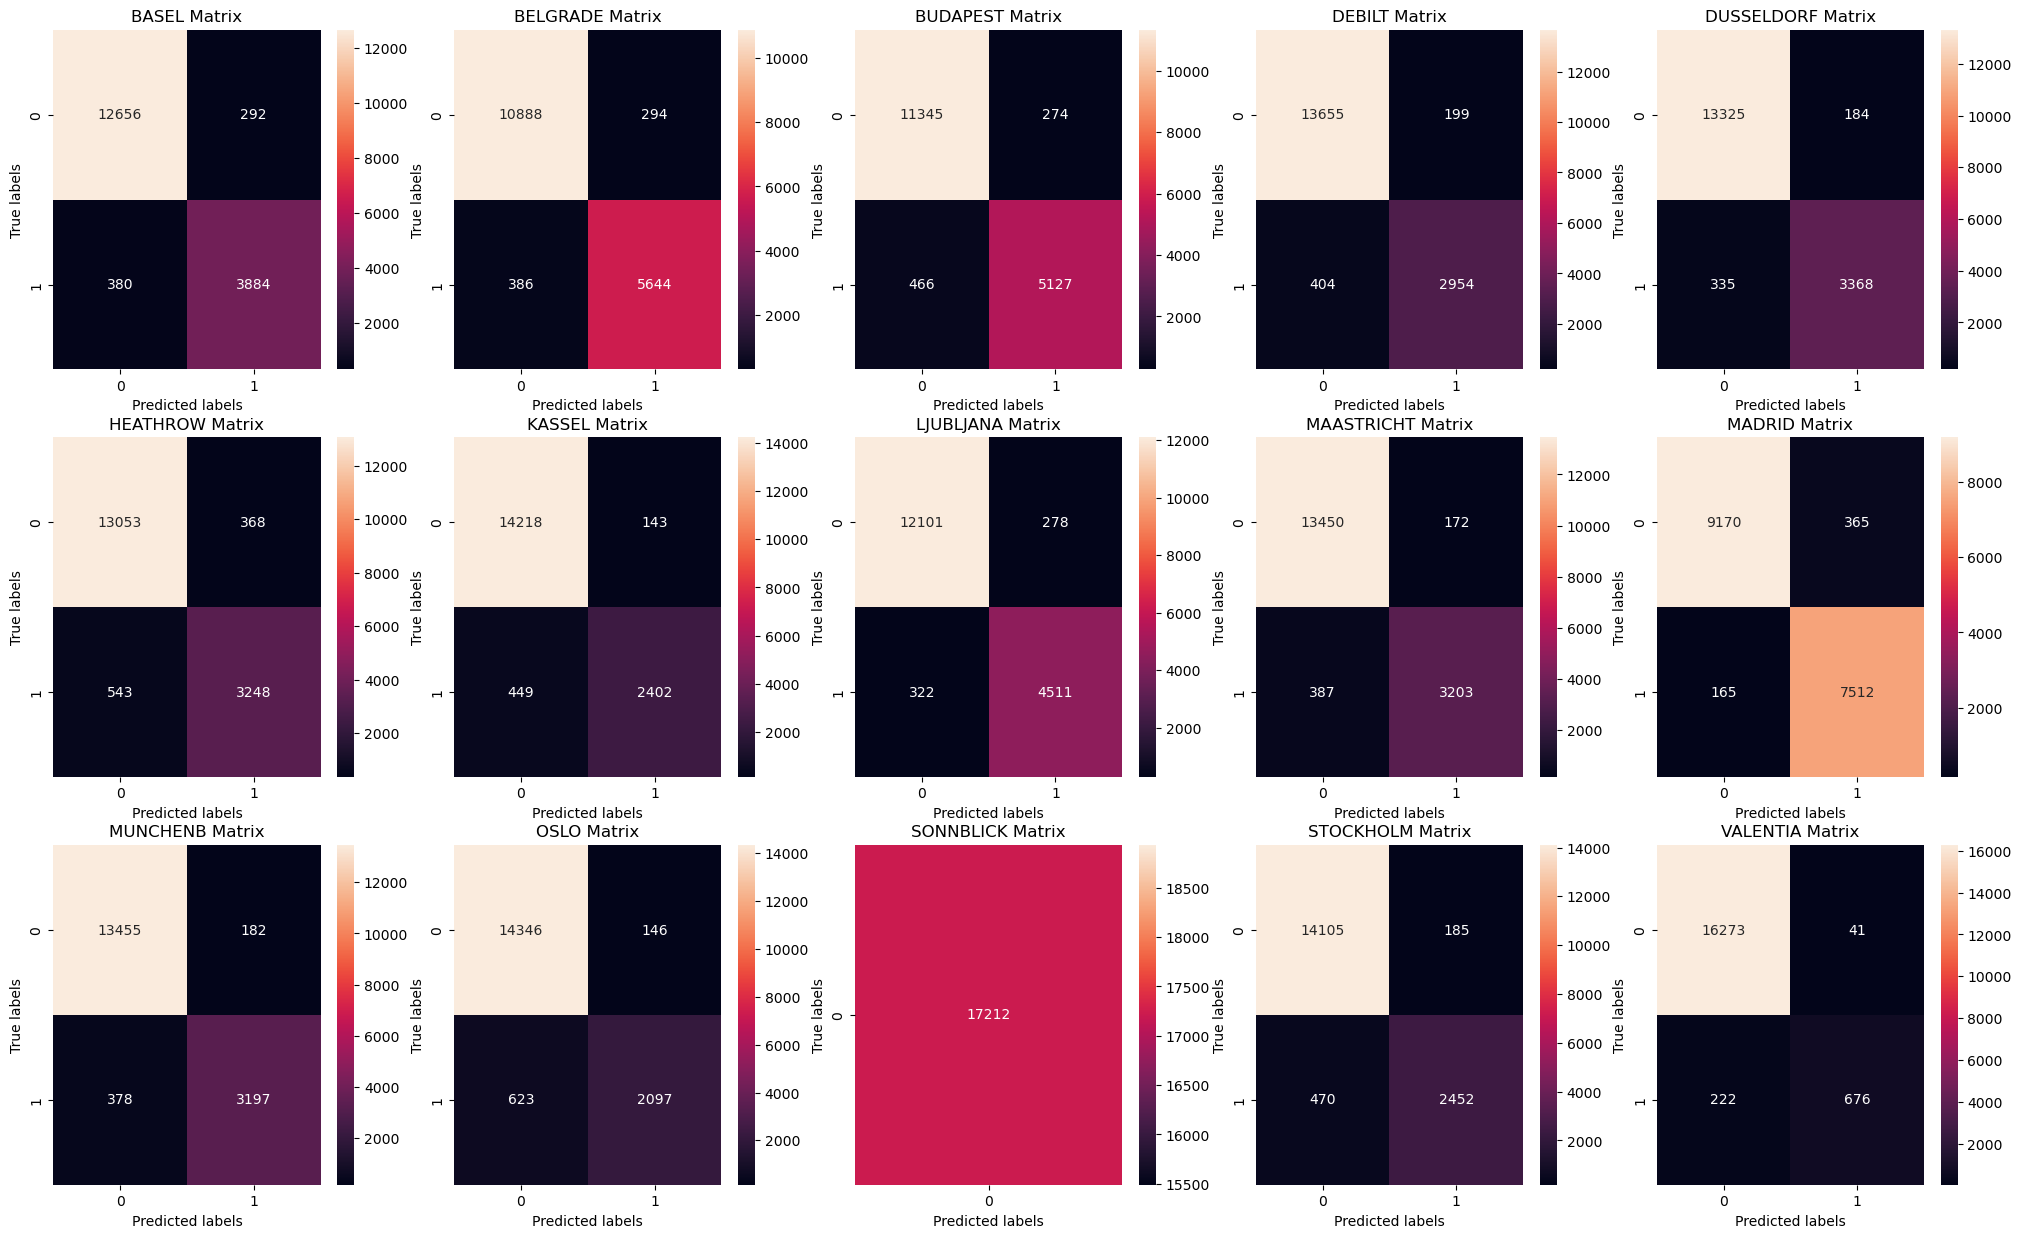

In [69]:
locations = list({x.split("_")[0] for x in df_scaled.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1